# Bert Model

<img src="https://user-images.githubusercontent.com/1250095/49935094-73f99c80-ff13-11e8-8ba5-50a008ed4d20.png" />

In [32]:
%matplotlib inline
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt
import numpy as np

## GELU

Gaussian Error Linear Units
<img src="https://qph.c7.quoracdn.net/main-qimg-afa9fa5305569f7c9f028271a00cfacf" />
BERT는 비선형성을 위한 활성화 함수로 GELU를 사용합니다. GELU는 확률론적 개념을 도입하여 엘루보다 계산 비용이 저렴하고 빠르게 수렴합니다. 
exp()이나 σ()는 계산 비용이 많이 든다.

Gaussian Error Linear Unit(GELU)

\begin{align}
f(x) &= 0.5x(1 + tanh[ \sqrt{2/\pi}(x + 0.044715x^3)]) \\
     &or \\
     &= x \sigma(1.702x)
\end{align}

In [17]:
def gelu(x):
    """
    Implementation of gelu activation function.
    gelu 함수 구현
    """
    
    # return 0.5 * x * (1.0 + torch.tanh(math.sqrt(2.0 / x) * (x + 0.044715 * math.pow(x, 3))))
    # OpenAI GPT's gelu is slightly different.
    # OpenAI GPT의 갤루는 조금 다릅니다.
    return x * 0.5 * (1.0 + torch.erf(x / math.sqrt(2.0)))

In [6]:
help(torch.erf)

Help on built-in function erf:

erf(...)
    erf(tensor, out=None) -> Tensor
    
    Computes the error function of each element. The error function is defined as follows:
    
    .. math::
        \mathrm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_{0}^{x} e^{-t^2} dt
    
    Args:
        tensor (Tensor): the input tensor
        out (Tensor, optional): the output tensor
    
    Example::
    
        >>> torch.erf(torch.tensor([0, -1., 10.]))
        tensor([ 0.0000, -0.8427,  1.0000])



In [18]:
x = torch.tensor([[1.0], [2.0]])
gelu(x)

tensor([[0.8413],
        [1.9545]])

In [21]:
x = torch.tensor(np.arange(-1, 1, 0.001))

In [25]:
y = gelu(x)

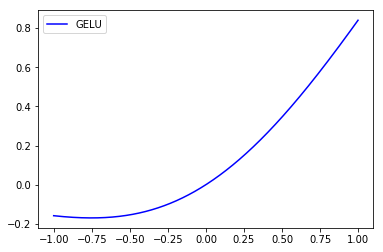

In [34]:
plt.plot(x.numpy(), y.numpy(), 'b', label='GELU')
plt.legend()